In [2]:
pip install tweepy nltk


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from dotenv import load_dotenv, dotenv_values
config = dotenv_values('.env')
config = dict(config)

import tweepy
import nltk

api_key = config['APIKEY']
api_secrets = config['APIKEYSECRET']
bearer_token = config['BEARERTOKEN']
access_token = config['ACCESSTOKEN']
access_token_secret = config['ACCESSTOKENSECRET']

auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('-------------------------\nSuccessful Authentication\n-------------------------')
except:
    print('-------------------------\nFailed authentication\n-------------------------')

-------------------------
Successful Authentication
-------------------------


We download the NTLK libraries and import the emotion lexicon

In [5]:
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('punkt')

from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [6]:
def get_emotions(tweet):
    emotions = {"anger": 0, "fear": 0, "joy": 0, "sadness": 0}
    tokens = word_tokenize(tweet)
    for token in tokens:
        synsets = wn.synsets(token)
        if synsets:
            synset = synsets[0]
            senti_synset = swn.senti_synset(synset.name())
            emotions["anger"] += senti_synset.obj_score() + senti_synset.neg_score()
            emotions["fear"] += senti_synset.neg_score()
            emotions["joy"] += senti_synset.pos_score()
            emotions["sadness"] += senti_synset.neg_score() + senti_synset.obj_score()
    return emotions


The Percentage of Emotions in Tweets are: 
{'anger': 42, 'fear': 3, 'joy': 1, 'sadness': 42}


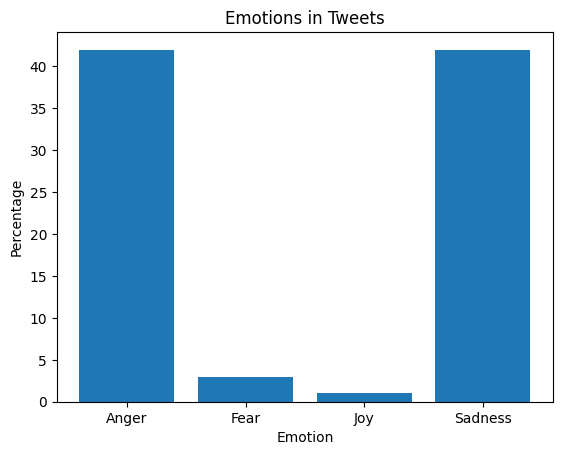

In [17]:
import matplotlib.pyplot as plt
query = "Australian GP"
tweets = tweepy.Cursor(api.search_tweets,
                           q=query,
                           lang="en",
                           tweet_mode="extended").items(100)


emotions = {"anger": 0, "fear": 0, "joy": 0, "sadness": 0}
total_words = 0

for tweet in tweets:
    text = tweet.full_text
    tweet_words = word_tokenize(text)
    total_words += len(tweet_words)
    tweet_emotions = get_emotions(text)
    for emotion in emotions:
        emotions[emotion] += tweet_emotions[emotion]

percentages = {}
for emotion in emotions:
    percentages[emotion] = round(emotions[emotion] / total_words * 100)

labels = ["Anger", "Fear", "Joy", "Sadness"]
values = [percentages["anger"], percentages["fear"], percentages["joy"], percentages["sadness"]]

print("The Percentage of Emotions in Tweets are: ")
print(percentages)

plt.bar(labels, values)
plt.title("Emotions in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Percentage")
plt.show()




ZeroDivisionError: division by zero

In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.6/7.6 MB 508.9 kB/s eta 0:00:00
     ------------------------------------ 163.0/163.0 kB 264.2 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 488.0 kB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 14.8/14.8 MB 291.4 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 305.5 kB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


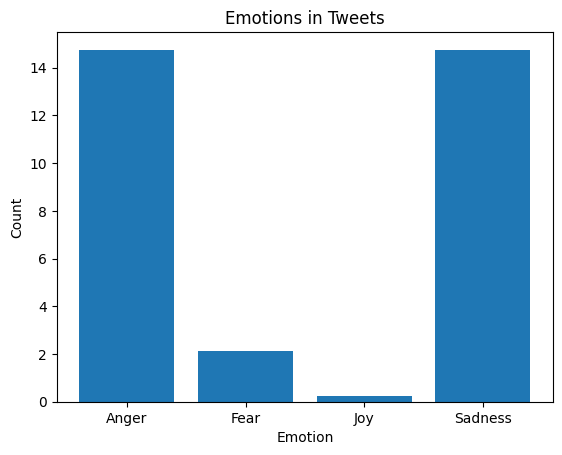

In [11]:

labels = ["Anger", "Fear", "Joy", "Sadness"]
values = [emotions["anger"], emotions["fear"], emotions["joy"], emotions["sadness"]]

plt.bar(labels, values)
plt.title("Emotions in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()
